# Kuramoto–Sivashinsky Equation

Usually, the [Kuramoto–Sivashinsky equation](https://en.wikipedia.org/wiki/Kuramoto%E2%80%93Sivashinsky_equation) is defined on 1D space with the following form:

$$
\frac{\partial \phi}{\partial t}
=-\frac{\partial^2 \phi}{\partial x^2} -\frac{\partial^4 \phi}{\partial x^4} - \phi\frac{\partial\phi}{\partial x}
$$

## Solution in 1D

In [1]:
from torchfsm.operator import Operator, Laplacian, Biharmonic, Convection

def KuramotoSivashinsky() -> Operator:
    ks_eqn = -Laplacian()- Biharmonic()-Convection()
    ks_eqn.regisiter_additional_check(lambda dim_value,dim_mesh: dim_value ==1 and dim_mesh ==1)
    return ks_eqn
ks_eqn=KuramotoSivashinsky()

In [2]:
import torch
from torchfsm.mesh import MeshGrid
from torchfsm.traj_recorder import AutoRecorder, IntervalController
from torchfsm.plot import plot_traj
device='cuda' if torch.cuda.is_available() else 'cpu'
L=60.0; N=100; 

mesh=MeshGrid([(0,L,N)],device=device)
x=mesh.bc_mesh_grid()
u_0=torch.randn_like(x)
traj=ks_eqn.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.5,
    step=200,
    trajectory_recorder=AutoRecorder(),
)

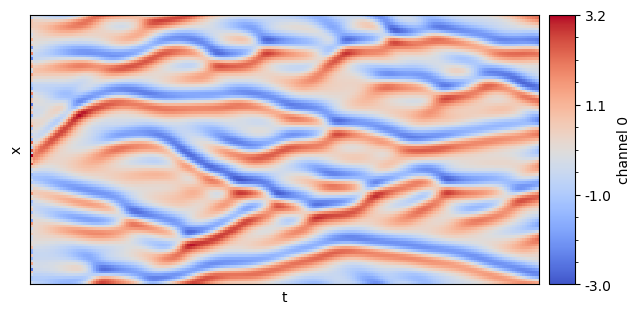

In [3]:
plot_traj(traj,animation=False)

If you add different coefficients to the terms, you can control the behavior of the solution. For example, a benchmark KS problem $^{[1,2]}$ in PINNs has the following form: 

$$
 \frac{\partial \phi}{\partial t}=-\frac{100}{16^2}\frac{\partial^2 \phi}{\partial x^2}-\frac{100}{16^4}\frac{\partial^4 \phi}{\partial x^4}-\frac{100}{16}\phi\frac{\partial \phi}{\partial x}
$$

> [1] Zhongkai Hao, Jiachen Yao, Chang Su, et al.. "PINNacle: A Comprehensive Benchmark of Physics-Informed Neural Networks for Solving PDEs." Arxiv preprint 2306.08827.
> 
> [2] Sifan Wang, Shyam Sankaran, and Paris Perdikaris. “Respecting causality for training physics-informed neural networks.” Computer Methods in Applied Mechanics and Engineering 421 (2024): 116813. 

With these coefficients, you can observe the transition to a chaotic state within a short time:

In [4]:
def KuramotoSivashinsky_Coef(a=100/16**2,b=100/16**4,c=100/16) -> Operator:
    ks_eqn = -a*Laplacian() - b*Biharmonic() - c*Convection()
    ks_eqn.regisiter_additional_check(lambda dim_value,dim_mesh: dim_value ==1 and dim_mesh ==1)
    return ks_eqn
ks_eqn=KuramotoSivashinsky_Coef()

In [5]:
mesh=MeshGrid([(0,2*torch.pi,N)],device=device)
x=mesh.bc_mesh_grid()
u_0=torch.cos(x)*(1+torch.sin(x))
traj=ks_eqn.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.01,
    step=100,
    trajectory_recorder=AutoRecorder(),
)

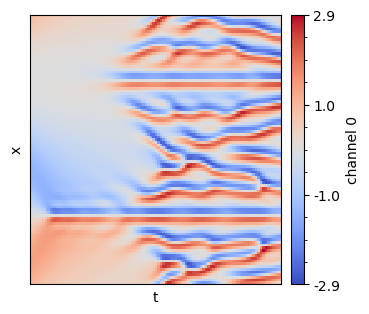

In [6]:
plot_traj(traj,animation=False)

## Solution in 2D

The Kuramoto–Sivashinsky equation can also be generalized to higher dimensions. In spatially periodic domains, one possibility is

$$
\frac{\partial \mathbf{\phi}}{\partial t}
=-\nabla^2 \phi- \nabla^4 \phi - \frac{1}{2}|\nabla \phi|^2
$$

Note that the above two equations are also not equivalent in 1D space.

We can solve the 2D KS equation using the same approach as in the 1D case:

In [7]:
from torchfsm.operator import KSConvection
def KuramotoSivashinskyHighDim() -> Operator:
    return -Laplacian()- Biharmonic()-KSConvection()
ks_eqn=KuramotoSivashinskyHighDim()

In [8]:
mesh=MeshGrid([(0,L,N),(0,L,N)],device=device)
x,y=mesh.bc_mesh_grid()
u_0=torch.randn_like(x)
traj=ks_eqn.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.5,
    step=200,
    trajectory_recorder=AutoRecorder(IntervalController(start=50),
                                     include_initial_state=False),
)

In [9]:
plot_traj(traj,animation=True)

## Solution in 3D

In [10]:
mesh=MeshGrid([(0,L,N),(0,L,N),(0,L,N)],device=device)
x,_,_=mesh.bc_mesh_grid()
u_0=torch.randn_like(x)
traj=ks_eqn.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.5,
    step=200,
    trajectory_recorder=AutoRecorder(IntervalController(start=50),
                                     include_initial_state=False),
)

In [11]:
plot_traj(traj)